# part 3 follow along

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)

In [2]:
df = pd.DataFrame({
    "Likes Popcorn" : [1,1,0,1,0,0],
    "Age": [12, 87, 44, 19, 32, 14],
    "Fav Color": ['B','G','B','R','G','B'],
    "Loves Troll": [1,1,0,0,1,1]
})
df

,Likes Popcorn,Age,Fav Color,Loves Troll
0,1,12,B,1
1,1,87,G,1
2,0,44,B,0
3,1,19,R,0
4,0,32,G,1
5,0,14,B,1


In [3]:
df = pd.get_dummies(df)
df

,Likes Popcorn,Age,Loves Troll,Fav Color_B,Fav Color_G,Fav Color_R
0,1,12,1,True,False,False
1,1,87,1,False,True,False
2,0,44,0,True,False,False
3,1,19,0,False,False,True
4,0,32,1,False,True,False
5,0,14,1,True,False,False


In [4]:
# rerraange
df = df.iloc[:,[0,1,3,4,5,2]]
df = df.copy()
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll
0,1,12,True,False,False,1
1,1,87,False,True,False,1
2,0,44,True,False,False,0
3,1,19,False,False,True,0
4,0,32,False,True,False,1
5,0,14,True,False,False,1


## Step 1

- log of odd

- convert odds to probability

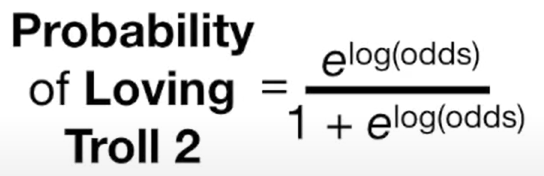

In [5]:
## Step 1a
odds = (df['Loves Troll'] == 1).sum()/(df['Loves Troll'] == 0).sum()
logodds = np.log(odds)
df['pred1_logodds'] = logodds
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds
0,1,12,True,False,False,1,0.693
1,1,87,False,True,False,1,0.693
2,0,44,True,False,False,0,0.693
3,1,19,False,False,True,0,0.693
4,0,32,False,True,False,1,0.693
5,0,14,True,False,False,1,0.693


In [6]:
p = np.exp(logodds)/(1 + np.exp(logodds))
p

df['pred1_prob'] = p
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob
0,1,12,True,False,False,1,0.693,0.667
1,1,87,False,True,False,1,0.693,0.667
2,0,44,True,False,False,0,0.693,0.667
3,1,19,False,False,True,0,0.693,0.667
4,0,32,False,True,False,1,0.693,0.667
5,0,14,True,False,False,1,0.693,0.667


## Step 2: Calculate residuals

residuals  = observed - prev predictions


In [7]:
df['res1'] = df['Loves Troll'] - df['pred1_prob']
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1
0,1,12,True,False,False,1,0.693,0.667,0.333
1,1,87,False,True,False,1,0.693,0.667,0.333
2,0,44,True,False,False,0,0.693,0.667,-0.667
3,1,19,False,False,True,0,0.693,0.667,-0.667
4,0,32,False,True,False,1,0.693,0.667,0.333
5,0,14,True,False,False,1,0.693,0.667,0.333


## Step 3:

Create a tree to predict residuals


In [8]:
df.columns

Index(['Likes Popcorn', 'Age', 'Fav Color_B', 'Fav Color_G', 'Fav Color_R',
       'Loves Troll', 'pred1_logodds', 'pred1_prob', 'res1'],
      dtype='object')

In [9]:
x = np.array(df[['Likes Popcorn', 'Age', 'Fav Color_B', 'Fav Color_G', 'Fav Color_R']])
y = np.array(df['res1'])

[Text(0.6, 0.8333333333333334, 'Fav Color_R <= 0.5\nsquared_error = 0.222\nsamples = 6\nvalue = 0.0'),
 Text(0.4, 0.5, 'Age <= 38.0\nsquared_error = 0.16\nsamples = 5\nvalue = 0.133'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 3\nvalue = 0.333'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = -0.167'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = -0.667')]

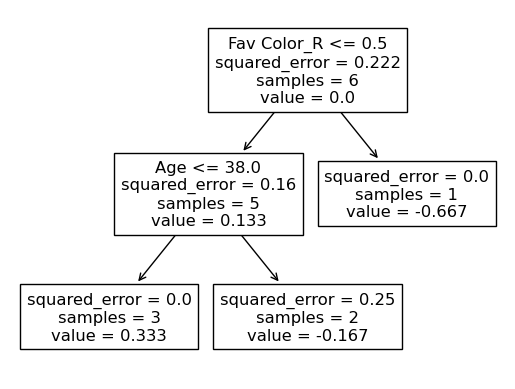

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

t1 = DecisionTreeRegressor(max_leaf_nodes=3)
t1.fit(x,y)
tree.plot_tree(t1, feature_names=['Likes Popcorn','Age', 'Fav Color_B', 'Fav Color_G', 'Fav Color_R'])

In [12]:
trs = []
trs.append(t1)

In [14]:
df["leaf_1"] = t1.apply(x)
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1,leaf_1
0,1,12,True,False,False,1,0.693,0.667,0.333,3
1,1,87,False,True,False,1,0.693,0.667,0.333,4
2,0,44,True,False,False,0,0.693,0.667,-0.667,4
3,1,19,False,False,True,0,0.693,0.667,-0.667,2
4,0,32,False,True,False,1,0.693,0.667,0.333,3
5,0,14,True,False,False,1,0.693,0.667,0.333,3


In [18]:
gp = df.groupby('leaf_1')
leaf_pred = gp.apply(lambda dummy: dummy["res1"].sum()/(dummy["pred1_prob"]*(1-dummy["pred1_prob"])).sum())

In [25]:
df['pred2_logodd'] = [leaf_pred[l] for l in df['leaf_1']]
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1,leaf_1,pred2_logodd
0,1,12,True,False,False,1,0.693,0.667,0.333,3,1.50
1,1,87,False,True,False,1,0.693,0.667,0.333,4,-0.75
2,0,44,True,False,False,0,0.693,0.667,-0.667,4,-0.75
3,1,19,False,False,True,0,0.693,0.667,-0.667,2,-3.00
4,0,32,False,True,False,1,0.693,0.667,0.333,3,1.50
5,0,14,True,False,False,1,0.693,0.667,0.333,3,1.50


In [26]:
df['pred2_prob'] = np.exp(df['pred2_logodd'])/(1+np.exp(df['pred2_logodd']))
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1,leaf_1,pred2_logodd,pred2_prob
0,1,12,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818
1,1,87,False,True,False,1,0.693,0.667,0.333,4,-0.75,0.321
2,0,44,True,False,False,0,0.693,0.667,-0.667,4,-0.75,0.321
3,1,19,False,False,True,0,0.693,0.667,-0.667,2,-3.00,0.047
4,0,32,False,True,False,1,0.693,0.667,0.333,3,1.50,0.818
5,0,14,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818


In [27]:
df['res2'] = df['Loves Troll'] - df['pred2_prob']
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1,leaf_1,pred2_logodd,pred2_prob,res2
0,1,12,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182
1,1,87,False,True,False,1,0.693,0.667,0.333,4,-0.75,0.321,0.679
2,0,44,True,False,False,0,0.693,0.667,-0.667,4,-0.75,0.321,-0.321
3,1,19,False,False,True,0,0.693,0.667,-0.667,2,-3.00,0.047,-0.047
4,0,32,False,True,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182
5,0,14,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182


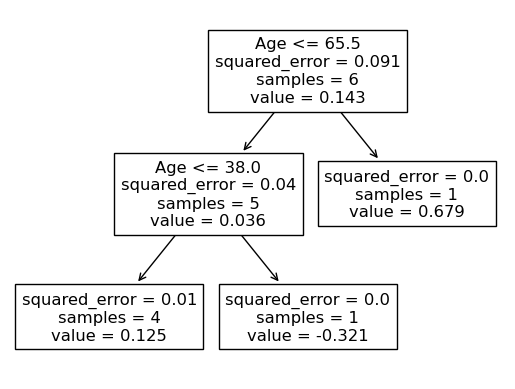

In [28]:
x = np.array(df[['Likes Popcorn', 'Age', 'Fav Color_B', 'Fav Color_G', 'Fav Color_R']])
y = np.array(df['res2'])

t2 = DecisionTreeRegressor(max_leaf_nodes=3)
t2.fit(x,y)
tree.plot_tree(t2, feature_names=['Likes Popcorn','Age', 'Fav Color_B', 'Fav Color_G', 'Fav Color_R'])

trs.append(t2)

In [29]:
df["leaf_2"] = t2.apply(x)
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1,leaf_1,pred2_logodd,pred2_prob,res2,leaf_2
0,1,12,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3
1,1,87,False,True,False,1,0.693,0.667,0.333,4,-0.75,0.321,0.679,2
2,0,44,True,False,False,0,0.693,0.667,-0.667,4,-0.75,0.321,-0.321,4
3,1,19,False,False,True,0,0.693,0.667,-0.667,2,-3.00,0.047,-0.047,3
4,0,32,False,True,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3
5,0,14,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3


In [30]:
gp = df.groupby('leaf_2')
leaf_pred = gp.apply(lambda dummy: dummy["res2"].sum()/(dummy["pred2_prob"]*(1-dummy["pred2_prob"])).sum())

df['pred3_logodd'] = [leaf_pred[l] for l in df['leaf_2']]
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1,leaf_1,pred2_logodd,pred2_prob,res2,leaf_2,pred3_logodd
0,1,12,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3,1.015
1,1,87,False,True,False,1,0.693,0.667,0.333,4,-0.75,0.321,0.679,2,3.117
2,0,44,True,False,False,0,0.693,0.667,-0.667,4,-0.75,0.321,-0.321,4,-1.472
3,1,19,False,False,True,0,0.693,0.667,-0.667,2,-3.00,0.047,-0.047,3,1.015
4,0,32,False,True,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3,1.015
5,0,14,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3,1.015


In [31]:
df['pred3_prob'] = np.exp(df['pred3_logodd'])/(1+np.exp(df['pred3_logodd']))
df

,Likes Popcorn,Age,Fav Color_B,Fav Color_G,Fav Color_R,Loves Troll,pred1_logodds,pred1_prob,res1,leaf_1,pred2_logodd,pred2_prob,res2,leaf_2,pred3_logodd,pred3_prob
0,1,12,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3,1.015,0.734
1,1,87,False,True,False,1,0.693,0.667,0.333,4,-0.75,0.321,0.679,2,3.117,0.958
2,0,44,True,False,False,0,0.693,0.667,-0.667,4,-0.75,0.321,-0.321,4,-1.472,0.187
3,1,19,False,False,True,0,0.693,0.667,-0.667,2,-3.00,0.047,-0.047,3,1.015,0.734
4,0,32,False,True,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3,1.015,0.734
5,0,14,True,False,False,1,0.693,0.667,0.333,3,1.50,0.818,0.182,3,1.015,0.734
